<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/Ensmallen_Automatic_Graph_Retieval_KGOBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensmallen Automatic Graph Retrieval - KGOBO
In this tutorial we will explore how to use the graphs that can be automatically retrieved by [Ensmallen](https://github.com/AnacletoLAB/ensmallen) from [OboFoundry](http://www.obofoundry.org/) through [Justin Reese](https://github.com/justaddcoffee) and [Harry Caufield](https://github.com/caufieldjh) [KGX](https://github.com/biolink/kgx)-based pipeline, [KG-OBO](https://github.com/Knowledge-Graph-Hub/kg-obo).

The graphs available are those that can be currently converted from the OBO format to KGX format, and will be downloaded from the [kg-obo website](https://kg-hub.berkeleybop.io/kg-obo/).

## Installing GraPE
In order to install the [GraPE library](https://github.com/AnacletoLAB/grape), which includes the [Ensmallen](https://github.com/AnacletoLAB/ensmallen) (efficient graph data structure) and [Embiggen](https://github.com/monarch-initiative/embiggen) (graph machine learning) modules, run:

```bash
pip install grape
```

## Installing Ensmallen
In order to install exclusively the Ensmallen graph library (for instance if you want to avoid having dependencies to TensorFlow) just run:

```bash
pip install ensmallen
```

In [3]:
!pip install -q grape

## Which OBO graphs are available?
To get a list of all the OBO graphs currently available from Ensmallen, we can quickly get the dataframe with all of the graphs data and query it.

In [4]:
from ensmallen.datasets import get_all_available_graphs_dataframe

In [5]:
available_graphs = get_all_available_graphs_dataframe()
available_graphs[available_graphs.repository == "kgobo"]

,repository,graph_name,version
1327,kgobo,ZFS,2020-03-10
1328,kgobo,MF,2020-08-07
1329,kgobo,DPO,2021-09-02
1330,kgobo,NCBITAXON,2021-06-10
1331,kgobo,ZFA,2020-04-14
...,...,...,...
1413,kgobo,ECO,2021-09-14
1414,kgobo,MOP,2014-09-03
1415,kgobo,FBDV,2021-09-01
1416,kgobo,SO,2021-07-12


## How to load up a graph
To retrieve one of the available OBO graphs, as per any other repository, you can use:

In [6]:
from ensmallen.datasets.kgobo import ZFS

In [7]:
graph = ZFS()

Let's get the graph report:

In [8]:
graph

<h2>ZFS</h2><p>The undirected graph ZFS has 77 homogeneous nodes and 149 heterogenous edges.</p><h3>RAM requirements</h3><p>The RAM requirements for the nodes and edges data structures are 17.52KB and 536.00B respectively.</p><h3>Degree centrality</h3><p>The minimum node degree is 0, the maximum node degree is 53, the mode degree is 4, the mean degree is 3.87 and the node degree median is 4.</p><p>The nodes with highest degree centrality are: <a href='http://purl.obolibrary.org/obo/ZFS_0100000' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0100000'>OBO:ZFS_0100000</a> (degree 53 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000045' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000045'>OBO:ZFS_0000045</a> (degree 12 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000048' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000048'>OBO:ZFS_0000048</a> (degree 10 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000047' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000047'>OBO:ZFS_0000047</a> (degree 9 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>) and <a href='http://purl.obolibrary.org/obo/ZFS_0000049' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000049'>OBO:ZFS_0000049</a> (degree 9 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>).</p><h3>Disconnected nodes</h3><p>Disconnected nodes are nodes that are not connected to any other node.The graph contains 15 disconnected nodes.</p><h4>Singleton nodes</h4><p>Singleton nodes are nodes with no edge to other nodes nor selfloops. The graph contains 15 singleton nodes, which are <a href='http://purl.obolibrary.org/obo/BFO_0000050' target='_blank' title='Go to Basic Formal Ontology to get more informations about BFO:0000050'>BFO:0000050</a> (node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://www.w3.org/1999/02/22-rdf-syntax-ns#comment' target='_blank' title='Go to RDF to get more informations about rdfs:comment'>rdfs:comment</a> (node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://www.w3.org/1999/02/22-rdf-syntax-ns#label' target='_blank' title='Go to RDF to get more informations about rdfs:label'>rdfs:label</a> (node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://www.geneontology.org/formats/oboInOwl#created_by' target='_blank' title='Go to Gene Ontology OBO in OWL to get more informations about OIO:created_by'>OIO:created_by</a> (node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' 

## Some example operations on the graph
Here follows some examples of operations that can be executed on the graph object.

### How to easily find a method
The library includes a user recommender system to help you find any method, for instance suppose you want to compute the diameter and do not know the method name, or maybe are distracted and mistype it:

In [19]:
graph.djametr

AttributeError: ignored

Additionally, generally speaking you can alway use the `dir` method to search for a method:

In [20]:
dir(graph)

['__and__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_repr_html_',
 'add_selfloops',
 'approximated_vertex_cover_set',
 'are_nodes_remappable',
 'complete_walks',
 'connected_components',
 'connected_holdout',
 'contains',
 'contains_identity_matrix',
 'cooccurence_matrix',
 'decode_edge',
 'drop_disconnected_nodes',
 'drop_parallel_edges',
 'drop_selfloops',
 'drop_singleton_nodes',
 'drop_singleton_nodes_with_selfloops',
 'drop_unknown_edge_types',
 'drop_unknown_node_types',
 'dump_edges',
 'dump_nodes',
 'enable',
 'encode_edge',
 'filter_from_ids',
 'filter_from_names',
 'from_csv',
 'generate_barbel

Finally, to see a method documentation you can use:

In [21]:
help(graph.get_node_degrees)

Help on built-in function get_node_degrees:

get_node_degrees() method of builtins.Graph instance
    Returns the unweighted degree of every node in the graph



### Enabling time-memory tradeoffs
The Ensmallen library includes a few time-memory tradeoffs that allow you to choose to spend more memory and get faster execution times. While we do not currently enable these by default because we do not know what you will be doing with the graph object, in most use cases (graphs within a few million nodes) they can be enabled without cornerns.

In [9]:
graph.enable()

### Diameter of the graph
Computing the diameter of the graph using [ifub](https://who.rocq.inria.fr/Laurent.Viennot/road/papers/ifub.pdf).

Since the graph is not connected, it has infinite diameter:

In [11]:
%%time
graph.get_diameter()

CPU times: user 13 µs, sys: 2 µs, total: 15 µs
Wall time: 18.8 µs


inf

In order to get the diameter of the component with the most central node, you can use:

In [12]:
%%time
graph.get_diameter(ignore_infinity=True)

CPU times: user 359 µs, sys: 56 µs, total: 415 µs
Wall time: 2.43 ms


2.0

### Connected components
Compute the connected components of the graph:

In [14]:
%%time
(component_ids, components_number, minimum_component_size, maximum_component_size) = graph.connected_components()

CPU times: user 2.11 ms, sys: 893 µs, total: 3 ms
Wall time: 5.18 ms


### Betweenness centrality
Compute efficiently the Betweenness centrality using the algorithm described in [Parallel Algorithms for Evaluating Centrality Indices in Real-world Networks](https://ieeexplore.ieee.org/document/1690659/).

In [18]:
%%time
graph.get_betweenness_centrality()

CPU times: user 774 µs, sys: 0 ns, total: 774 µs
Wall time: 778 µs


array([8.33333333e-01, 1.19133333e+03, 3.33333333e-01, 8.33333333e-01,
       8.33333333e-01, 3.33333333e-01, 0.00000000e+00, 3.33333333e-01,
       1.05000000e+01, 3.33333333e-01, 8.33333333e-01, 1.38333333e+01,
       8.33333333e-01, 2.20000000e+01, 3.33333333e-01, 3.33333333e-01,
       8.33333333e-01, 3.33333333e-01, 1.00000000e+00, 0.00000000e+00,
       3.33333333e-01, 1.05000000e+01, 1.00000000e+00, 3.33333333e-01,
       2.16666667e+00, 3.33333333e-01, 3.33333333e-01, 8.33333333e-01,
       8.33333333e-01, 7.16666667e+00, 3.33333333e-01, 3.33333333e-01,
       3.33333333e-01, 8.33333333e-01, 8.33333333e-01, 8.33333333e-01,
       3.33333333e-01, 5.33333333e+00, 8.33333333e-01, 3.33333333e-01,
       3.33333333e-01, 3.33333333e-01, 3.33333333e-01, 3.33333333e-01,
       3.33333333e-01, 8.33333333e-01, 3.33333333e-01, 3.33333333e-01,
       8.33333333e-01, 3.33333333e-01, 0.00000000e+00, 3.33333333e-01,
       3.33333333e-01, 8.33333333e-01, 0.00000000e+00, 0.00000000e+00,
      

### Visualizing the graph
To visualize the graph using dot we can get help from the Embiggen submodule (which is already installed if you have installed from GraPE):

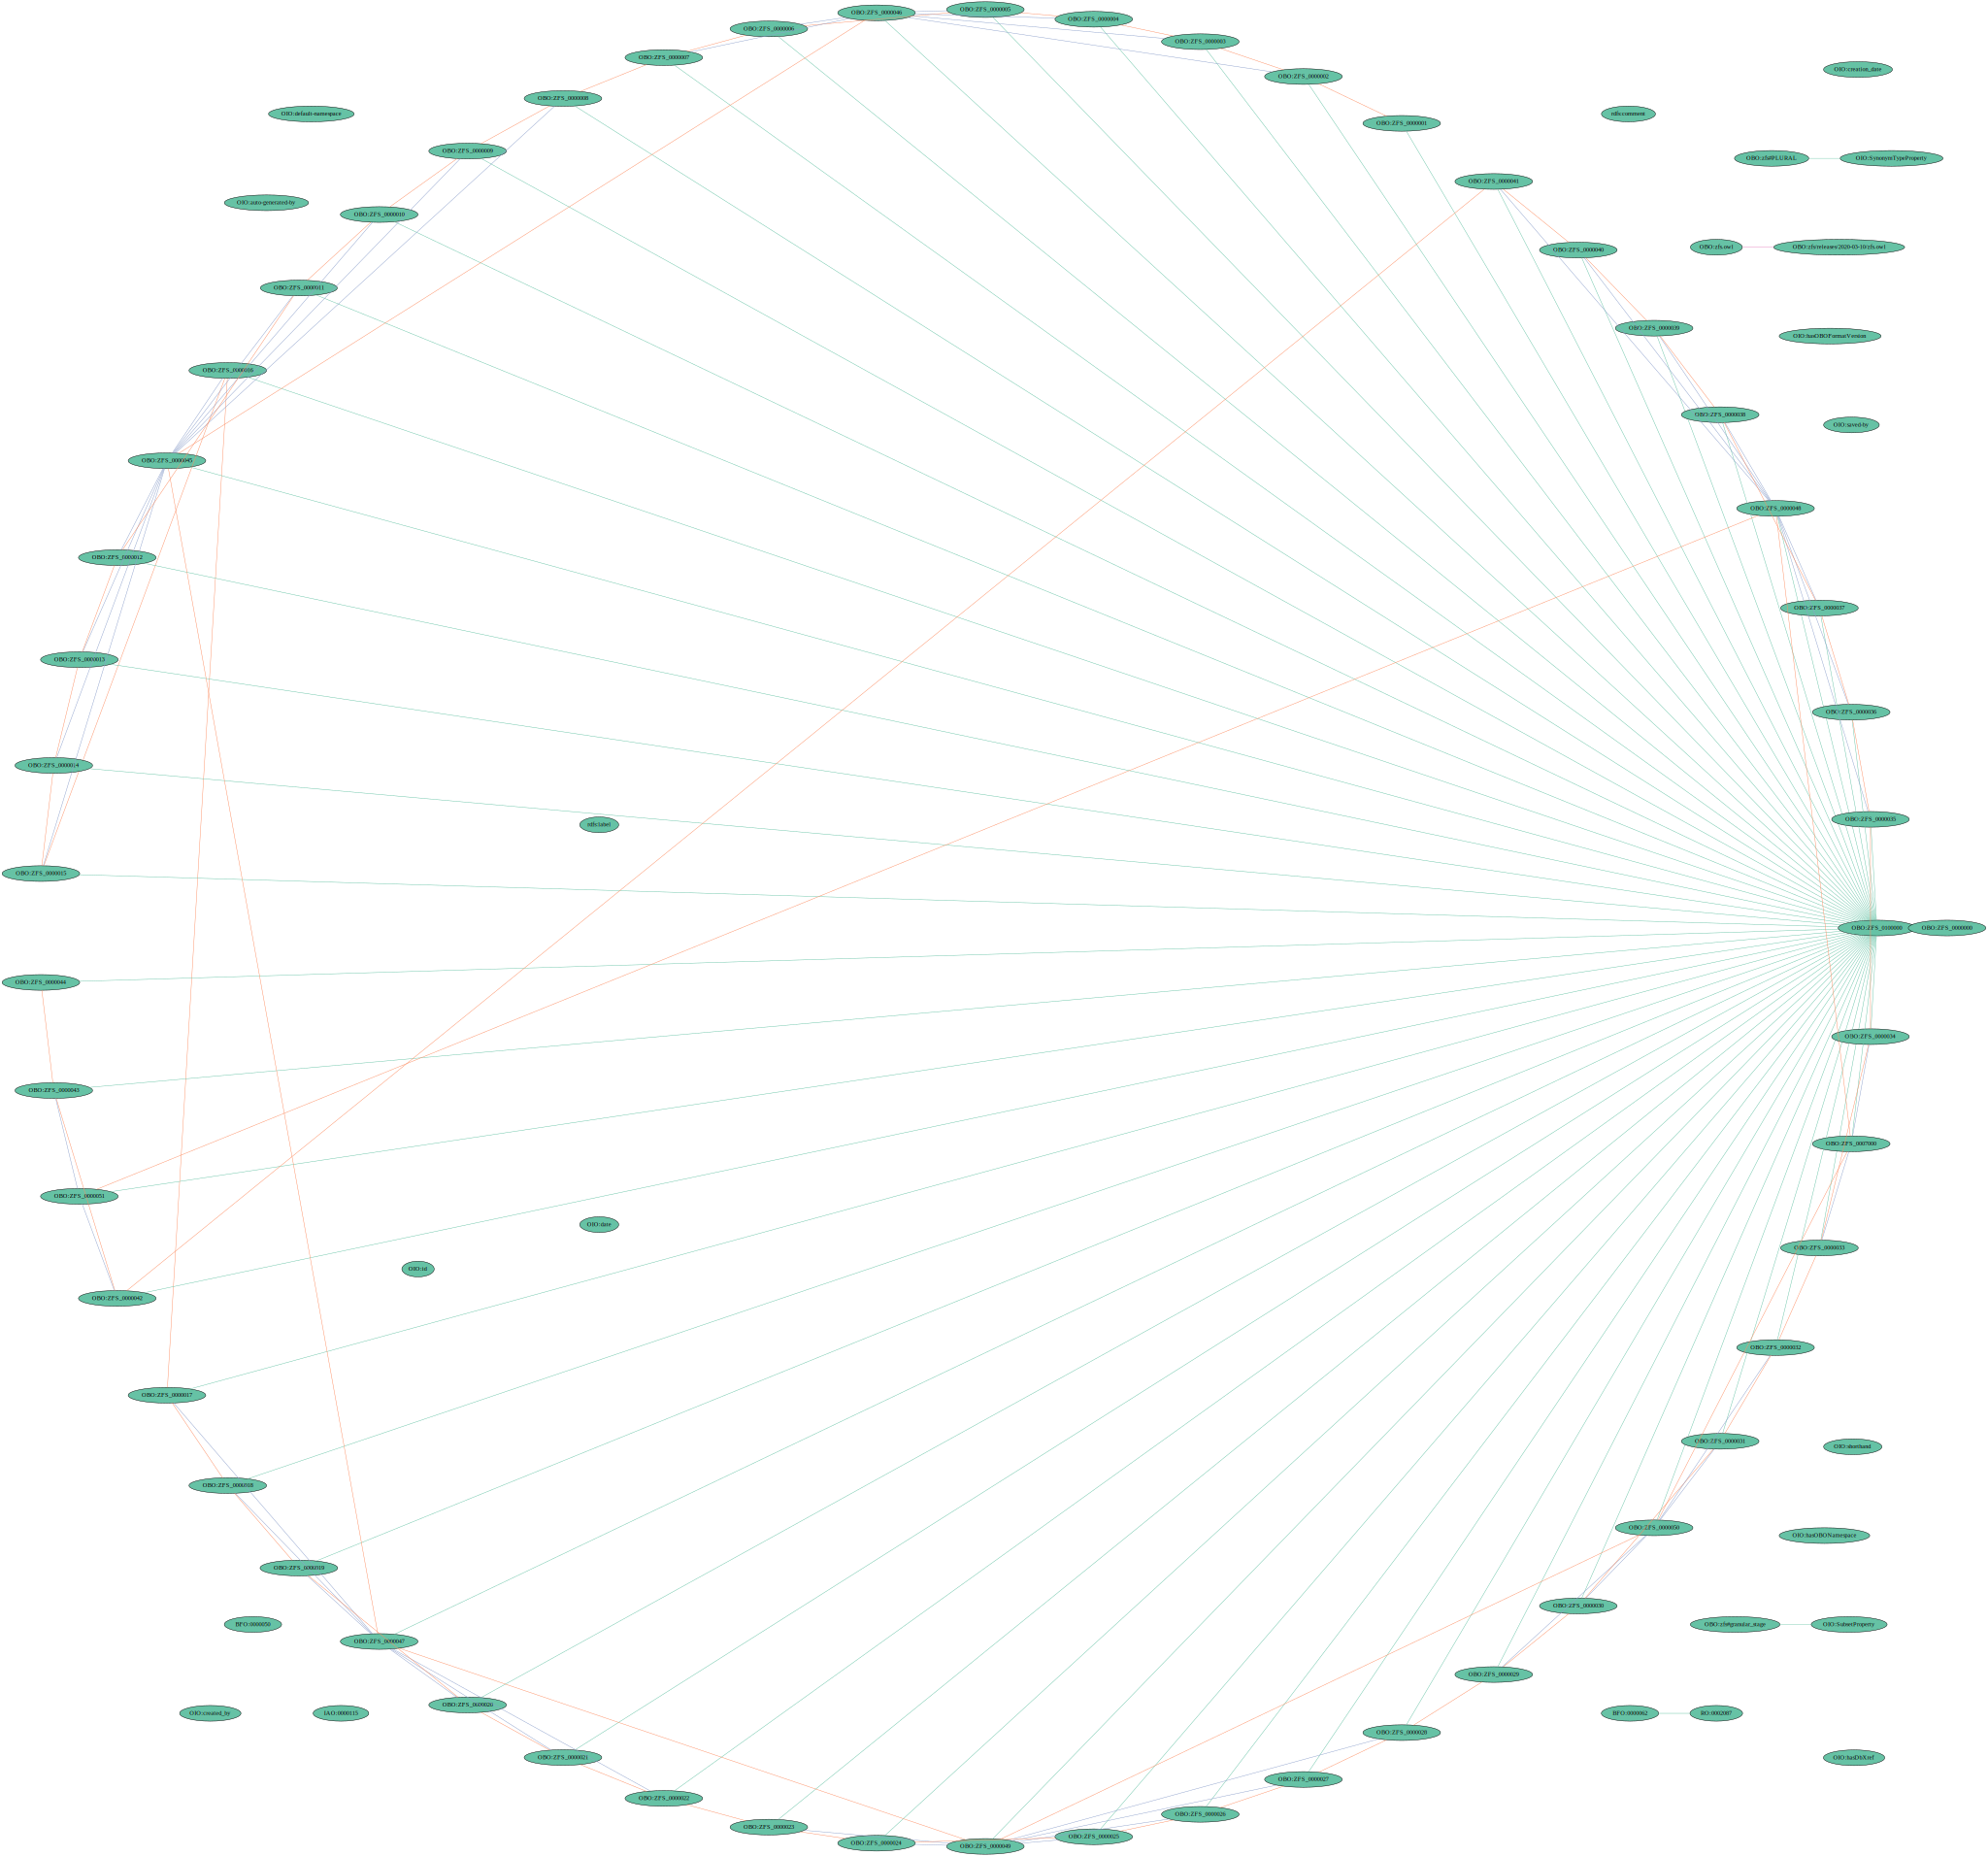

In [22]:
from embiggen.visualizations import GraphVisualization

GraphVisualization(graph).plot_dot()

## Compute the graph node embedding
Before running this section, **remember to require a GPU instance**!

In [23]:
from embiggen.pipelines import get_available_node_embedding_methods, compute_node_embedding

The node embedding methods currently supported can be retrieved as follows:

In [24]:
get_available_node_embedding_methods()

['CBOW',
 'GloVe',
 'SkipGram',
 'Siamese',
 'TransE',
 'SimplE',
 'TransH',
 'TransR']

Let's use TransE:

In [27]:
(node_embedding, node_type_embedding, edge_type_embedding), history = compute_node_embedding(
    graph,
    node_embedding_method_name="TransE"
)

/usr/local/lib/python3.7/dist-packages/embiggen/pipelines/compute_node_embedding.py:258: UserWarning: It does not make sense to use mirrored strategy when GPUs are not available.
The parameter has been disabled.
  "It does not make sense to use mirrored strategy "
/usr/local/lib/python3.7/dist-packages/embiggen/pipelines/compute_node_embedding.py:266: UserWarning: It was not possible to detect GPUs but the system has NVIDIA drivers installed.
It is very likely there is some mis-configuration with your TensorFlow instance.
The model will train a LOT faster if you figure out what may be the cause of this issue on your system: sometimes a simple reboot will do a lot of good.
  "It was not possible to detect GPUs but the system "


Let's take a look at the node embedding:

In [28]:
node_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
OBO:ZFS_0000016,0.049745,0.022866,0.027611,-0.053739,0.105950,0.093550,0.014989,-0.044730,0.037665,-0.007142,0.074774,0.024541,-0.002667,0.087482,-0.014256,0.044719,-0.078377,0.102680,-0.032635,0.006133,0.051235,-0.009975,0.019292,0.080406,-0.055678,0.087620,-0.004956,0.017364,0.017971,0.039785,-0.001796,-0.034384,0.076576,-0.067081,-0.024849,0.048302,0.065410,-0.000884,-0.096131,0.037559,...,-0.052787,-0.016546,0.007303,0.045011,-0.014945,0.080672,0.062300,-0.082551,0.058933,-0.002736,0.041832,0.027599,-0.063790,0.077698,-0.021025,0.100908,-0.073174,-0.008799,0.022335,0.056786,0.020468,0.075485,-0.001077,0.035254,-0.014292,0.042003,0.043547,-0.003213,-0.059937,0.081831,0.009896,0.038579,-0.008217,-0.047170,0.026568,-0.005778,-0.035028,0.074453,-0.003971,0.021936
OBO:ZFS_0100000,0.014419,0.006884,-0.020725,-0.052523,0.104652,0.073138,0.069188,0.026211,0.070598,0.065120,-0.064412,-0.001829,0.027287,0.034209,-0.019141,0.023151,0.017021,0.055577,-0.022570,-0.025573,0.019332,-0.026326,0.045842,0.069377,0.044291,0.045778,0.023354,-0.058420,0.054788,0.015456,-0.007125,-0.024434,0.047383,0.023523,-0.013724,0.013119,0.077518,-0.008417,0.037580,-0.021033,...,-0.021389,-0.011126,0.042442,0.106936,0.023663,0.065358,-0.035976,-0.042159,0.004332,-0.017622,0.031816,-0.022964,0.008611,0.067962,-0.038582,0.025663,-0.009006,0.042750,-0.015950,0.057610,0.007765,0.029295,0.026221,0.012823,0.030981,0.013416,-0.017605,-0.060736,-0.044964,-0.051732,0.026667,0.036844,-0.001970,-0.103373,-0.013645,-0.002084,-0.024232,0.063996,-0.027667,-0.021905
OBO:ZFS_0000026,0.040915,0.083364,0.015112,-0.018978,0.067134,-0.065010,0.015400,0.015999,0.080428,0.021866,-0.061993,-0.058516,-0.046472,0.056036,-0.009610,-0.097682,-0.021041,-0.043009,0.069037,-0.000643,0.025179,0.013002,0.019849,0.025670,0.020161,0.025947,0.048035,-0.051809,-0.026723,-0.110331,0.000174,0.012241,0.023701,0.034848,-0.082013,-0.003004,-0.065544,-0.039877,0.078013,-0.073015,...,0.001585,0.022229,-0.028772,0.040202,0.027242,0.020914,0.012485,0.018086,0.037122,0.020566,0.011150,-0.028257,0.011857,0.027374,0.050207,-0.011098,0.033693,0.068884,-0.073918,-0.037635,-0.012645,0.077300,0.019327,-0.026504,0.036953,0.015526,0.084918,-0.073308,-0.063937,-0.093115,0.074683,0.030936,0.008604,-0.076648,-0.082167,0.003282,-0.024117,0.058271,-0.025768,0.006208
OBO:ZFS_0000033,-0.044181,-0.006047,0.006644,-0.002671,-0.010574,-0.011644,0.087099,0.034013,0.040601,0.090622,-0.072635,0.072648,-0.004463,0.002255,-0.025817,-0.059636,0.064047,-0.055442,-0.028956,-0.051045,0.083146,-0.064869,0.029471,-0.013331,0.045030,-0.011885,-0.029455,-0.085111,0.017681,0.005755,0.025729,-0.050626,0.020202,0.059319,-0.038528,-0.040369,0.062610,-0.001222,0.133411,-0.044468,...,-0.034095,-0.055337,0.028934,0.089780,0.088061,-0.031411,-0.053701,0.016034,-0.096253,0.078834,-0.014295,0.015112,0.110528,0.031049,-0.001887,-0.034483,0.102138,0.024921,-0.045046,-0.010302,0.004085,-0.046251,-0.004394,-0.059274,-0.034250,0.044684,-0.064602,-0.039498,0.045140,-0.070447,0.004576,-0.059642,-0.018332,-0.030890,-0.034830,0.025831,-0.016484,0.019132,-0.004945,-0.086121
OBO:ZFS_0000022,0.033067,0.041204,-0.008169,-0.023503,0.085345,0.003188,-0.018274,-0.016584,0.060627,0.011590,-0.000493,-0.063213,-0.031482,0.055452,-0.002610,-0.070061,-0.045571,0.049222,0.035131,0.078754,0.047373,0.035706,-0.016092,0.054080,0.002223,0.075420,0.031992,0.010609,-0.010504,-0.090987,-0.022685,0.023820,0.024722,0.002107,-0.095616,0.024457,-0.037743,0.024258,0.002750,-0.060144,...,-0.034506,0.004964,-0.032307,0.061325,-0.040549,0.043774,0.020298,-0.033189,0.073366,-0.002847,0.031785,0.002050,-0.030229,0.080849,0.066521,0.044772,-0.028644,0.025471,-0.053333,-0.018529,0.034297,0.087537,0.003843,-0.016639,0.002798,0.045547,0.067930,-0.080774

And the node types embedding:

In [29]:
node_type_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
biolink:NamedThing,-0.009219,0.038599,-0.036901,-0.020577,-0.017879,0.007063,0.061558,0.038519,0.05426,-0.007898,-0.055073,-0.095311,0.064128,-0.047416,-0.07187,0.087723,0.046842,-0.014283,0.050699,0.011184,-0.08954,-0.001043,0.058753,0.051347,0.072326,-0.047657,0.019423,0.021154,0.062824,-0.065796,-0.03378,-0.011479,0.003271,0.025387,-0.029217,0.058057,0.025723,0.083307,-0.020834,0.059492,...,-0.038392,0.113747,0.040086,-0.017202,-0.068111,0.03768,-0.081777,-0.048909,0.053581,-0.040412,-0.026801,-0.072521,0.024766,0.047224,-0.05343,-0.002977,-0.057668,-0.035979,0.064511,0.044705,-0.058842,-0.01282,0.048615,0.091844,0.074079,-0.037373,-0.07155,-0.03223,0.045081,-0.02326,0.033809,0.07703,-0.019379,0.020302,0.010875,0.027947,0.018545,-0.039849,0.00739,-0.043313


And finally the edge types embedding:

In [30]:
edge_type_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
biolink:subclass_of,0.026699,-0.032369,0.004342,-0.045183,0.136421,0.089229,0.019526,0.002644,0.034781,0.073276,-0.009329,0.050718,-0.020090,0.092619,0.035541,-0.060633,-0.011193,0.075502,-0.077741,-0.023657,0.062966,-0.032491,0.001075,0.037918,-0.010988,0.080441,0.016870,-0.083344,0.002161,0.074729,0.012858,-0.013981,0.051404,0.008357,0.029665,-0.028870,0.057794,-0.066729,0.054052,-0.059459,...,0.006787,-0.099142,0.013180,0.132445,0.090112,0.032352,0.025917,-0.003489,-0.035671,0.000370,0.062428,0.032767,-0.019869,0.048939,0.003114,0.036289,0.024783,0.078911,-0.072996,0.026554,0.062932,0.051369,-0.004639,-0.055676,-0.022164,0.028549,0.051828,-0.061150,-0.111673,-0.048271,-0.000492,-0.002304,0.010778,-0.137880,-0.017466,-0.006880,-0.031208,0.107849,-0.026336,0.014670
biolink:preceded_by,0.033353,-0.022218,0.008925,-0.029635,0.107224,0.064465,0.000304,0.001091,-0.001146,0.058566,0.004731,0.092783,-0.045419,0.090821,0.056082,-0.076241,-0.013097,0.071114,-0.079779,-0.024684,0.121446,-0.015191,-0.009790,0.006745,-0.040040,0.079808,0.010987,-0.074980,-0.027944,0.078529,0.018003,-0.015906,0.041933,0.006631,0.001090,-0.029804,0.043767,-0.079138,0.053143,-0.086635,...,0.018765,-0.106809,-0.004985,0.113616,0.098362,0.007286,0.064747,0.028119,-0.065655,0.026605,0.059033,0.038996,-0.009174,0.017838,0.012473,0.036161,0.042994,0.063633,-0.076337,-0.005304,0.071056,0.048879,-0.016757,-0.064872,-0.040958,0.038910,0.070669,-0.022481,-0.092933,-0.027051,0.002717,-0.050070,0.005788,-0.111897,-0.017636,-0.016988,-0.041043,0.081162,-0.024548,0.020910
biolink:part_of,0.032042,-0.023266,0.016990,-0.022046,0.098769,0.055313,-0.014736,-0.006166,-0.010767,0.050886,0.019132,0.094479,-0.051619,0.090837,0.058895,-0.084872,-0.022311,0.064361,-0.079496,-0.020515,0.121540,-0.012835,-0.019548,-0.002063,-0.046763,0.077438,0.007014,-0.068948,-0.036181,0.078683,0.021085,-0.012866,0.036824,-0.000549,0.005586,-0.035868,0.030678,-0.079298,0.047080,-0.083687,...,0.021724,-0.111352,-0.013719,0.101413,0.097744,-0.001525,0.072043,0.034427,-0.066934,0.031051,0.056172,0.045398,-0.015143,0.008397,0.019822,0.033507,0.046833,0.060054,-0.075207,-0.014142,0.073992,0.047588,-0.022713,-0.069114,-0.046053,0.038897,0.077482,-0.016110,-0.090537,-0.020102,-0.001927,-0.054980,0.006538,-0.099588,-0.017020,-0.016419,-0.038816,0.079258,-0.019799,0.026912
owl:versionIRI,0.021054,-0.030701,0.028028,0.004574,0.048754,0.018901,-0.044761,-0.022611,-0.037866,0.020517,0.046153,0.087335,-0.061523,0.070276,0.066041,-0.091365,-0.033380,0.034285,-0.064002,-0.008945,0.097406,-0.003189,-0.041611,-0.031226,-0.063771,0.055195,-0.005954,-0.039827,-0.058035,0.069143,0.024827,0.002461,0.013520,-0.013075,0.020002,-0.044227,-0.007514,-0.075752,0.029025,-0.066339,...,0.031661,-0.107444,-0.031541,0.047695,0.081606,-0.027393,0.080999,0.046162,-0.057964,0.036529,0.039428,0.057695,-0.022000,-0.025241,0.041719,0.018185,0.048390,0.042694,-0.069044,-0.036745,0.066508,0.032046,-0.035969,-0.078533,-0.060501,0.032896,0.080576,0.012479,-0.070081,0.006846,-0.018638,-0.065716,0.011812,-0.051354,-0.010638,-0.018003,-0.024239,0.052886,-0.008882,0.039976


### Visualizing the computed node embedding
We can use the visualizer, transforming the node embedding using a TSNE, to get a visualization of its node degrees and edge types:

In [31]:
from embiggen.visualizations import GraphVisualization

visualizer = GraphVisualization(graph)

visualizer.fit_transform_nodes(node_embedding)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 77 samples in 0.000s...
[t-SNE] Computed neighbors for 77 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 77 / 77
[t-SNE] Mean sigma: 5.513509
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.673489
[t-SNE] KL divergence after 1000 iterations: 0.224647


(<Figure size 600x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe7c583d0d0>)

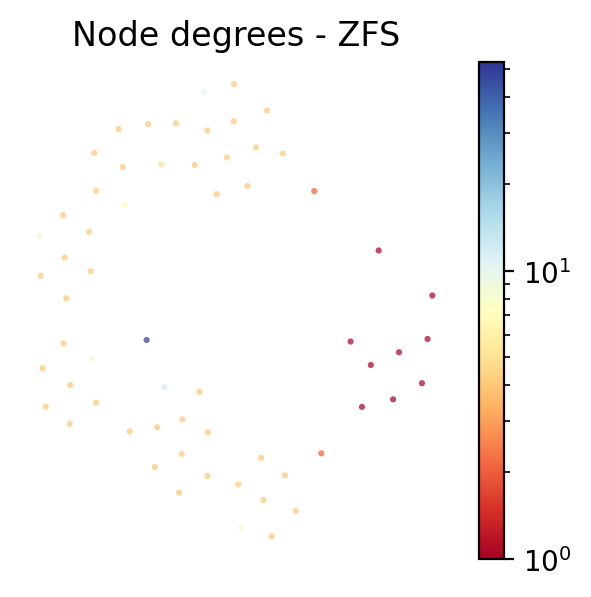

In [41]:
visualizer.plot_node_degrees(annotate_nodes=False, figsize=(3, 3))

(<Figure size 600x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe7c5955590>)

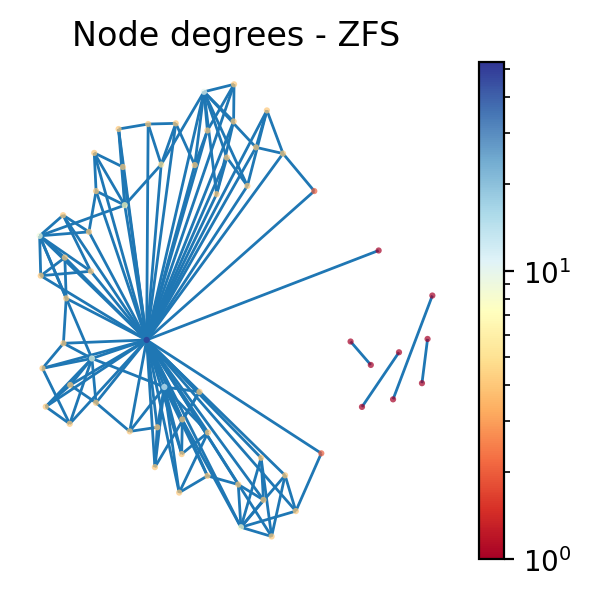

In [40]:
visualizer.plot_node_degrees(annotate_nodes=False, figsize=(3, 3), show_edges=True)

(<Figure size 1000x1000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe7d7a68e10>)

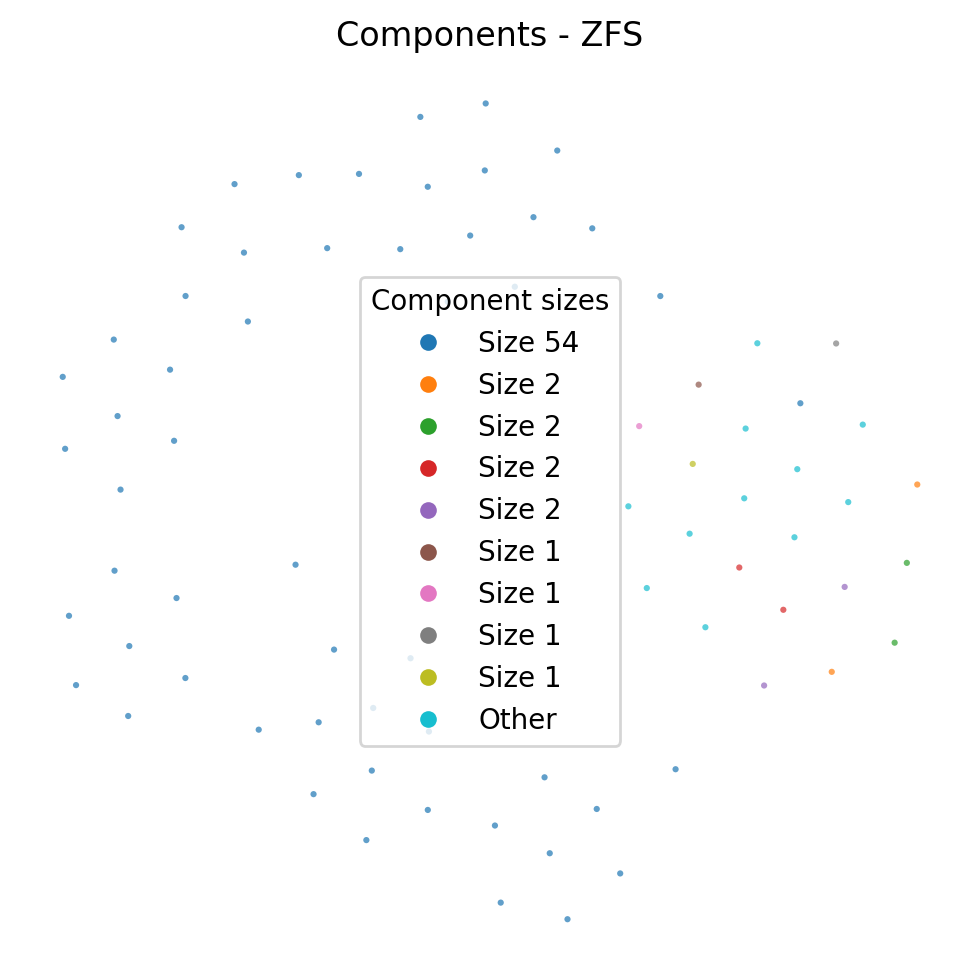

In [38]:
visualizer.plot_connected_components(annotate_nodes=False, figsize=(5, 5))

In [42]:
visualizer.fit_transform_edges(node_embedding)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 298 samples in 0.003s...
[t-SNE] Computed neighbors for 298 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 298 / 298
[t-SNE] Mean sigma: 3.484314
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.715958
[t-SNE] KL divergence after 1000 iterations: 0.115829


(<Figure size 800x800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe7c5dd12d0>)

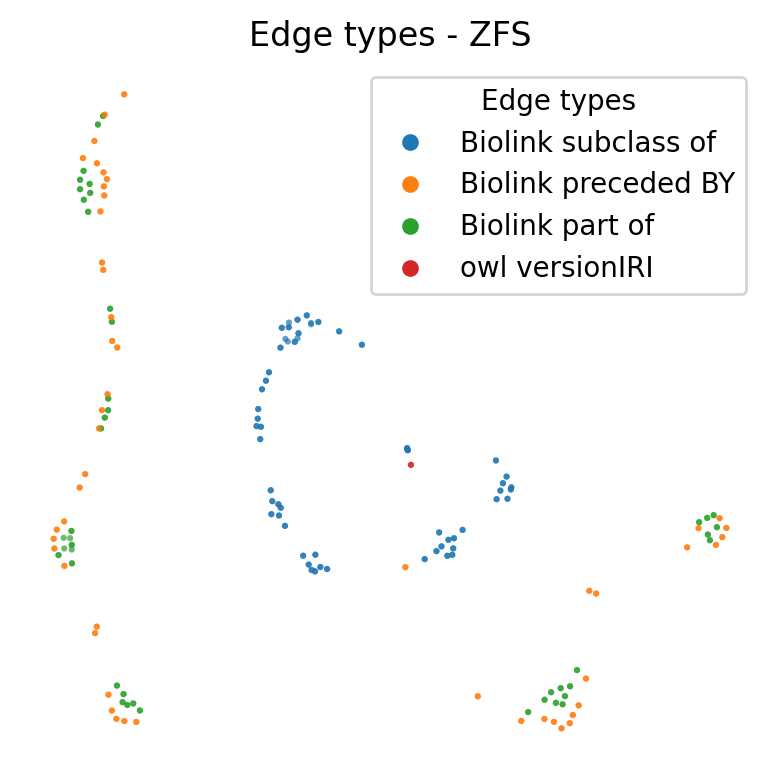

In [44]:
visualizer.plot_edge_types(figsize=(4, 4))

*Would you like this tutorial to include some more sections? Please do let us know [by opening a issue in the GraPE repository](https://github.com/AnacletoLAB/grape/issues/new).*